# Dimensionality Reduction

### Objective:

- Comparing PCA, LDA, QDA

10/5/2018<br>
Mooyoung Lee

# Load data: Boston House Price

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import datasets

data = datasets.load_digits()
df = pd.DataFrame(data.data)
df['target'] = data.target
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [2]:
df.isnull().sum().sum()

0

In [3]:
df.target.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

# Check distribution

- data transformation step will be skipped for this study

In [4]:
# import seaborn as sns

# for col in list(df):
#     plt.figure()
#     sns.distplot(df[col])

# Base Model: Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
y = df['target'].values
X = df.drop(['target'], axis = 1).values

clf = RandomForestClassifier()

from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
cv_obj = KFold(n_splits = 10, shuffle = True)

result = []
for train_index, test_index in cv_obj.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # train eval
    clf.fit(X_train, y_train)
    f1_train = f1_score(y_true = y_train, y_pred = clf.predict(X_train), average = 'weighted')
    
    # test eval
    y_hat = clf.predict(X_test)
    f1 = f1_score(y_true = y_test, y_pred = y_hat, average = 'weighted')
    result.append([f1_train, f1])

    
# Result Summary
result_fold = pd.DataFrame(np.round(result,3), columns = ['F1(Train)','F1(Test)'])
print('\nCV result :\n', result_fold)
print('\nCV average :\n', result_fold.mean())

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



CV result :
    F1(Train)  F1(Test)
0      0.999     0.971
1      1.000     0.939
2      1.000     0.961
3      0.998     0.972
4      1.000     0.972
5      1.000     0.944
6      1.000     0.917
7      0.999     0.989
8      0.999     0.945
9      1.000     0.961

CV average :
 F1(Train)    0.9995
F1(Test)     0.9571
dtype: float64


### Base model shows a very little overfitting. 

Text(0.5,1,'KFold Evaluation')

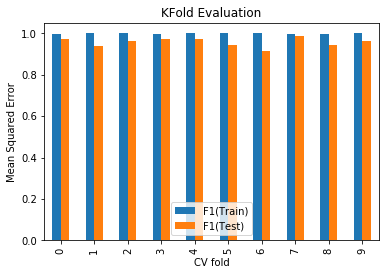

In [6]:
result_fold.plot(kind='bar')
plt.legend(['F1(Train)','F1(Test)'])
plt.xlabel('CV fold')
plt.ylabel('F1-Score')
plt.title('KFold Evaluation')

# PCA, LDA, & QDA

In [7]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# y = np.array(y, dtype = np.float64)

pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X)
print('PCA feature shape : {}'.format(X_pca.shape))

lda = LinearDiscriminantAnalysis(n_components = 10)
X_lda = lda.fit_transform(X,y)
print('LDA feature shape : {}'.format(X_lda.shape))



PCA feature shape : (1797, 10)
LDA feature shape : (1797, 9)


C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


# Classifier score w/ PCA 10 features

In [8]:
y = df['target'].values
X = X_pca
print('PCA feature shape : {}'.format(X.shape))

clf = RandomForestClassifier()

from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
cv_obj = KFold(n_splits = 10, shuffle = True)

result = []
for train_index, test_index in cv_obj.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # train eval
    clf.fit(X_train, y_train)
    f1_train = f1_score(y_true = y_train, y_pred = clf.predict(X_train), average = 'weighted')
    
    # test eval
    y_hat = clf.predict(X_test)
    f1 = f1_score(y_true = y_test, y_pred = y_hat, average = 'weighted')
    result.append([f1_train, f1])

    
# Result Summary
result_fold2 = pd.DataFrame(np.round(result,3), columns = ['F1(Train)','F1(Test)'])
print('\nCV result :\n', result_fold2)
print('\nCV average :\n', result_fold2.mean())

PCA feature shape : (1797, 10)

CV result :
    F1(Train)  F1(Test)
0      0.999     0.967
1      0.999     0.934
2      0.997     0.955
3      0.999     0.944
4      0.998     0.956
5      0.998     0.913
6      0.998     0.934
7      0.999     0.910
8      0.998     0.955
9      0.999     0.931

CV average :
 F1(Train)    0.9984
F1(Test)     0.9399
dtype: float64


# Classifier score w/ LDA features

In [9]:
y = df['target'].values
X = X_lda
print('PCA feature shape : {}'.format(X.shape))

clf = RandomForestClassifier()

from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
cv_obj = KFold(n_splits = 10, shuffle = True)

result = []
for train_index, test_index in cv_obj.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # train eval
    clf.fit(X_train, y_train)
    f1_train = f1_score(y_true = y_train, y_pred = clf.predict(X_train), average = 'weighted')
    
    # test eval
    y_hat = clf.predict(X_test)
    f1 = f1_score(y_true = y_test, y_pred = y_hat, average = 'weighted')
    result.append([f1_train, f1])

    
# Result Summary
result_fold3 = pd.DataFrame(np.round(result,3), columns = ['F1(Train)','F1(Test)'])
print('\nCV result :\n', result_fold3)
print('\nCV average :\n', result_fold3.mean())

PCA feature shape : (1797, 9)

CV result :
    F1(Train)  F1(Test)
0      0.999     0.978
1      0.999     0.911
2      0.997     0.967
3      0.998     0.978
4      0.998     0.949
5      0.999     0.955
6      1.000     0.944
7      0.998     0.978
8      1.000     0.945
9      0.998     0.905

CV average :
 F1(Train)    0.9986
F1(Test)     0.9510
dtype: float64


# Result comparison

### The test scores are not reduced much with reduced features using PCA and LDA techniques.

Average Test F1-Score:
 Original    0.957
PCA         0.940
LDA         0.951
dtype: float64


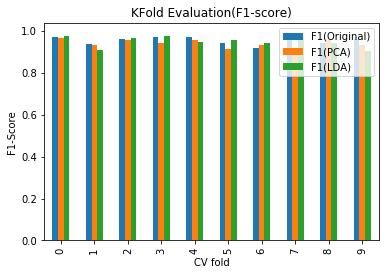

In [22]:
result = pd.DataFrame({'Original' :result_fold['F1(Test)'].values,
                       'PCA' : result_fold2['F1(Test)'].values, 
                       'LDA' : result_fold3['F1(Test)'].values})

result.plot(kind='bar')
plt.legend(['F1(Original)','F1(PCA)','F1(LDA)'])
plt.xlabel('CV fold')
plt.ylabel('F1-Score')
plt.title('KFold Evaluation(F1-score)')

print('Average Test F1-Score:\n',np.round(np.mean(result),3))